# 서울시 범죄현황 데이터 분석 프로젝트

In [7]:
## 1. 환경설정

In [8]:
# OS : Windows-10-10.0.22621-SP0
# Python : 3.9.18
# Numpy : 1.26.0
# Pandas : 2.1.1
# Matplotlib : 3.8.0
# Seaborn : 0.12.2
# Created: NOV. 09. 2023
# Author: D.W. SHIN

! conda install -y pandas matplotlib seaborn

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0




In [9]:
!pip install koreanize_matplotlib

In [10]:
# !pip install matplotlib==3.7.1

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [12]:
data = '../data/seoul_crime_2021.csv'
crime_raw_data = pd.read_csv(data, encoding='euc-kr')



In [13]:
# 데이터 프레임 상위 5개 확인
crime_raw_data.head()

,구분,죄종,발생검거,건수,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,중부,살인,발생,4,NaN,NaN,NaN,NaN,NaN
1,중부,살인,검거,4,NaN,NaN,NaN,NaN,NaN
2,중부,강도,발생,3,NaN,NaN,NaN,NaN,NaN
3,중부,강도,검거,3,NaN,NaN,NaN,NaN,NaN
4,중부,"강간,추행",발생,109,NaN,NaN,NaN,NaN,NaN


## 2. 데이터 전처리


### 2-1. 데이터 클리닝
- NaN
- 누락데이터
- 의미 없는 데이터 제거

In [14]:
crime_raw_data['죄종'].unique()

array(['살인', '강도', '강간,추행', '절도', '폭력', '강간'], dtype=object)

In [15]:
crime_raw_data.head(10)

,구분,죄종,발생검거,건수,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,중부,살인,발생,4,NaN,NaN,NaN,NaN,NaN
1,중부,살인,검거,4,NaN,NaN,NaN,NaN,NaN
2,중부,강도,발생,3,NaN,NaN,NaN,NaN,NaN
3,중부,강도,검거,3,NaN,NaN,NaN,NaN,NaN
4,중부,"강간,추행",발생,109,NaN,NaN,NaN,NaN,NaN
5,중부,"강간,추행",검거,57,NaN,NaN,NaN,NaN,NaN
6,중부,절도,발생,765,NaN,NaN,NaN,NaN,NaN
7,중부,절도,검거,426,NaN,NaN,NaN,NaN,NaN
8,중부,폭력,발생,945,NaN,NaN,NaN,NaN,NaN
9,중부,폭력,검거,801,NaN,NaN,NaN,NaN,NaN


In [16]:
# '성범죄'로 데이터 통일
crime_raw_data['죄종'] = crime_raw_data['죄종'].replace(
    ['강간,추행', '강간'], '성범죄'
)

In [17]:
crime_raw_data['죄종'].unique()

array(['살인', '강도', '성범죄', '절도', '폭력'], dtype=object)

In [18]:
# NaN 값이 있는 행 삭제
crime_raw_data.dropna(axis=1, inplace=True)

In [19]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [20]:
crime_raw_data.head(1)

,구분,죄종,발생검거,건수
0,중부,살인,발생,4


### 4-2. 데이터 전처리
- 데이터 프레임 형태 변경
- 다중 컬럼 수정

In [21]:
crime_raw_data.head(1)

,구분,죄종,발생검거,건수
0,중부,살인,발생,4


In [22]:
crime_station = pd.pivot_table(
    data=crime_raw_data,
    index='구분',
    columns=['죄종', '발생검거'],
    values='건수'
)

In [23]:
crime_station.head()

죄종      강도         살인         성범죄            절도              폭력        
발생검거    검거    발생   검거   발생     검거     발생     검거      발생      검거      발생
구분                                                                     
강남    11.0  13.0  6.0  8.0  325.0  428.0  737.0  1517.0  1699.0  1961.0
강동     6.0   6.0  3.0  3.0  103.0  124.0  889.0  1612.0  1461.0  1713.0
강북     1.0   1.0  4.0  4.0  115.0  136.0  537.0   777.0  1255.0  1383.0
강서     3.0   3.0  7.0  9.0  188.0  246.0  921.0  1540.0  1925.0  2098.0
관악     6.0   7.0  4.0  8.0  269.0  321.0  929.0  1860.0  1926.0  2248.0

In [24]:
# 3줄의 컬럼 중, 하나 삭제
# crime_station.columns = crime_station.columns.droplevel(0)

In [25]:
crime_station.columns

MultiIndex([( '강도', '검거'),
            ( '강도', '발생'),
            ( '살인', '검거'),
            ( '살인', '발생'),
            ('성범죄', '검거'),
            ('성범죄', '발생'),
            ( '절도', '검거'),
            ( '절도', '발생'),
            ( '폭력', '검거'),
            ( '폭력', '발생')],
           names=['죄종', '발생검거'])

In [26]:
# 살인이 발생한 건수 상위 5개
crime_station['살인', '발생'].sort_values(ascending=False).head()

구분
서초     9.0
강서     9.0
관악     8.0
영등포    8.0
강남     8.0
Name: (살인, 발생), dtype: float64

In [27]:
# 그러면, 강남경찰서에서 발생한 강도 사건 건수
# loc, iloc
crime_station.loc['강남', ('강도', '발생')]

13.0

In [28]:
tmp = crime_station.columns.get_level_values(0) + crime_station.columns.get_level_values(1)

In [29]:
crime_station.columns.get_level_values(1)

Index(['검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생'], dtype='object', name='발생검거')

In [30]:
len(crime_station.columns)

10

In [31]:
len(tmp)

10

In [32]:
crime_station.columns = tmp

In [33]:
crime_station.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,11.0,13.0,6.0,8.0,325.0,428.0,737.0,1517.0,1699.0,1961.0
강동,6.0,6.0,3.0,3.0,103.0,124.0,889.0,1612.0,1461.0,1713.0
강북,1.0,1.0,4.0,4.0,115.0,136.0,537.0,777.0,1255.0,1383.0
강서,3.0,3.0,7.0,9.0,188.0,246.0,921.0,1540.0,1925.0,2098.0
관악,6.0,7.0,4.0,8.0,269.0,321.0,929.0,1860.0,1926.0,2248.0


### 데이터 전처리
- 경찰서별 담당행정 구역 컬럼 생성하기
- 컬럼 생성 후 인덱스로 설정하기

In [34]:
# 전처리 작업을 위한 딕셔너리 데이터 복습
dict_sample = {
    'Name' : 'Dongweon',
    'Age' : 8,
    'Class' : 'Google'
}

In [35]:
dict_sample.keys()

dict_keys(['Name', 'Age', 'Class'])

In [36]:
dict_sample.values()

dict_values(['Dongweon', 8, 'Google'])

In [37]:
dict_sample.items()

dict_items([('Name', 'Dongweon'), ('Age', 8), ('Class', 'Google')])

In [38]:
for key, val in dict_sample.items():
    print(key, val)

Name Dongweon
Age 8
Class Google


In [39]:
crime_station.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='구분')

In [40]:
len(crime_station.index)

31

In [41]:
sample_datas = list(range(0, 31))
len(sample_datas)

31

In [42]:
crime_station['sample'] = sample_datas

In [43]:
real_gu ={
    '강남구'    : ['강남', '수서'],
    '강동구'    : ['강동'],
    '강북구'    : ['강북'],
    '강서구'    : ['강서'],
    '관악구'    : ['관악'],
    '광진구'    : ['광진'],
    '구로구'    : ['구로'],
    '금천구'    : ['금천'],
    '노원구'    : ['노원'],
    '도봉구'    : ['도봉'],
    '동대문구'  : ['동대문'],
    '동작구'    : ['동작'],
    '마포구'    : ['마포'],
    '서대문구'  : ['서대문'],
    '서초구'    : ['방배', '서초'],
    '성동구'    : ['성동'],
    '성북구'    : ['성북','종암'],
    '송파구'    : ['송파'],
    '양천구'    : ['양천'],
    '영등포구'  : ['영등포'],
    '용산구'    : ['용산'],
    '은평구'    : ['서부', '은평'],
    '종로구'    : ['종로', '혜화'],
    '중구'      : ['남대문','중부'],
    '중랑구'    : ['중랑']
}

In [44]:
sample_list = ['종로', '혜화']

'종로' in sample_list

True

In [45]:
# 반복문 for
# 조건문 if
rgu = []

for c_station in crime_station.index:
    for gu, station in real_gu.items():
        if c_station in station:
            # print(gu, c_station)
            rgu.append(gu)

In [46]:
len(rgu)

31

In [47]:
len(crime_station.index)

31

In [48]:
crime_station['구'] = rgu

In [49]:
crime_station.head(3)

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,sample,구
구분,,,,,,,,,,,,
강남,11.0,13.0,6.0,8.0,325.0,428.0,737.0,1517.0,1699.0,1961.0,0,강남구
강동,6.0,6.0,3.0,3.0,103.0,124.0,889.0,1612.0,1461.0,1713.0,1,강동구
강북,1.0,1.0,4.0,4.0,115.0,136.0,537.0,777.0,1255.0,1383.0,2,강북구


In [50]:
crime_gu = crime_station.pivot_table(
    index='구',
    aggfunc = np.sum
)

C:\Users\SBA\AppData\Local\Temp\ipykernel_6596\3033935934.py:1: FutureWarning: The provided callable <function sum at 0x0000014C4685BCA0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_gu = crime_station.pivot_table(


In [51]:
crime_gu.head()

,sample,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,,
강남구,21,23.0,25.0,11.0,12.0,454.0,578.0,1160.0,2372.0,2749.0,3159.0
강동구,1,6.0,6.0,3.0,3.0,103.0,124.0,889.0,1612.0,1461.0,1713.0
강북구,2,1.0,1.0,4.0,4.0,115.0,136.0,537.0,777.0,1255.0,1383.0
강서구,3,3.0,3.0,7.0,9.0,188.0,246.0,921.0,1540.0,1925.0,2098.0
관악구,4,6.0,7.0,4.0,8.0,269.0,321.0,929.0,1860.0,1926.0,2248.0


In [52]:
# 살인이 많이 일어난 구 상위 10개
crime_gu['살인발생'].sort_values(ascending = False).head(10)

구
강남구     12.0
서초구      9.0
강서구      9.0
관악구      8.0
영등포구     8.0
금천구      7.0
중구       6.0
노원구      6.0
종로구      6.0
광진구      5.0
Name: 살인발생, dtype: float64

In [53]:
# 절도 범죄가 가장 적게 일어난 구 상위 5개
crime_gu['절도발생'].sort_values().head(10)

구
도봉구      772.0
강북구      777.0
성북구      895.0
성동구      905.0
용산구      945.0
금천구     1013.0
서대문구    1027.0
종로구     1079.0
동작구     1129.0
동대문구    1240.0
Name: 절도발생, dtype: float64

### 데이터 전처리
- 기존 데이터를 이용한 새로운 컬럼 생성
    - 검거율 컬럼 생성

In [54]:
crime_gu.head(1)

,sample,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,,
강남구,21,23.0,25.0,11.0,12.0,454.0,578.0,1160.0,2372.0,2749.0,3159.0


In [55]:
(crime_gu['절도검거'] / crime_gu['절도발생']) * 100

구
강남구     48.903879
강동구     55.148883
강북구     69.111969
강서구     59.805195
관악구     49.946237
광진구     53.323904
구로구     55.395683
금천구     51.332675
노원구     48.052902
도봉구     48.704663
동대문구    53.145161
동작구     59.787422
마포구     48.344371
서대문구    54.722493
서초구     45.974717
성동구     54.917127
성북구     52.960894
송파구     49.160079
양천구     51.890289
영등포구    48.539720
용산구     51.216931
은평구     57.935393
종로구     46.709917
중구      57.779515
중랑구     59.685490
dtype: float64

In [56]:
my_cols = ['절도검거', '절도발생']
crime_gu[my_cols]

,절도검거,절도발생
구,,
강남구,1160.0,2372.0
강동구,889.0,1612.0
강북구,537.0,777.0
강서구,921.0,1540.0
관악구,929.0,1860.0
광진구,754.0,1414.0
구로구,770.0,1390.0
금천구,520.0,1013.0
노원구,654.0,1361.0


In [57]:
crime_gu.head(1)

,sample,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,,
강남구,21,23.0,25.0,11.0,12.0,454.0,578.0,1160.0,2372.0,2749.0,3159.0


In [58]:
crime_gu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sample  25 non-null     int64  
 1   강도검거    25 non-null     float64
 2   강도발생    25 non-null     float64
 3   살인검거    25 non-null     float64
 4   살인발생    25 non-null     float64
 5   성범죄검거   25 non-null     float64
 6   성범죄발생   25 non-null     float64
 7   절도검거    25 non-null     float64
 8   절도발생    25 non-null     float64
 9   폭력검거    25 non-null     float64
 10  폭력발생    25 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 2.9+ KB


In [59]:
arrest_col = ['강도검거', '살인검거', '성범죄검거', '절도검거', '폭력검거']
occur_col = ['강도발생', '살인발생', '성범죄발생', '절도발생', '폭력발생']
arrest_rate = ['강도검거율', '살인검거율', '성범죄검거율', '절도검거율', '폭력검거율']

In [60]:
crime_gu[occur_col].values

array([[2.500e+01, 1.200e+01, 5.780e+02, 2.372e+03, 3.159e+03],
       [6.000e+00, 3.000e+00, 1.240e+02, 1.612e+03, 1.713e+03],
       [1.000e+00, 4.000e+00, 1.360e+02, 7.770e+02, 1.383e+03],
       [3.000e+00, 9.000e+00, 2.460e+02, 1.540e+03, 2.098e+03],
       [7.000e+00, 8.000e+00, 3.210e+02, 1.860e+03, 2.248e+03],
       [4.000e+00, 5.000e+00, 2.080e+02, 1.414e+03, 1.456e+03],
       [2.000e+00, 5.000e+00, 1.820e+02, 1.390e+03, 1.907e+03],
       [3.000e+00, 7.000e+00, 1.340e+02, 1.013e+03, 1.282e+03],
       [3.000e+00, 6.000e+00, 1.560e+02, 1.361e+03, 1.899e+03],
       [2.000e+00, 2.000e+00, 7.200e+01, 7.720e+02, 1.012e+03],
       [7.000e+00, 3.000e+00, 1.690e+02, 1.240e+03, 1.540e+03],
       [1.000e+00, 2.000e+00, 1.800e+02, 1.129e+03, 1.319e+03],
       [4.000e+00, 4.000e+00, 3.210e+02, 1.510e+03, 1.701e+03],
       [2.000e+00, 3.000e+00, 1.370e+02, 1.027e+03, 1.109e+03],
       [5.000e+00, 9.000e+00, 3.120e+02, 1.503e+03, 1.827e+03],
       [4.000e+00, 3.000e+00, 1.100e+02,

In [61]:
crime_gu[arrest_rate] = np.round(crime_gu[arrest_col].divide(crime_gu[occur_col].values) * 100, 2)

In [62]:
crime_gu.loc['은평구', ['살인검거','살인발생']]

살인검거    5.0
살인발생    4.0
Name: 은평구, dtype: float64

In [63]:
(crime_gu.loc['은평구', '살인검거']
 / crime_gu.loc['은평구', '살인발생']) * 100

125.0

In [64]:
crime_gu[crime_gu.iloc[:,11:] > 100]

,sample,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,,
강남구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
강동구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
강서구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
관악구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
광진구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
구로구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
금천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.33,NaN,NaN,NaN,NaN
노원구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
crime_gu[crime_gu.iloc[:,11:] > 100] = 100

In [66]:
# crime_gu[crime_gu[arrest_rate] > 100] = 100

In [67]:
crime_gu.tail()

,sample,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,,
용산구,24,1.0,1.0,2.0,3.0,103.0,141.0,484.0,945.0,1069.0,1291.0,100.0,66.67,73.05,51.22,82.80
은평구,41,3.0,3.0,5.0,4.0,133.0,166.0,825.0,1424.0,1457.0,1647.0,100.0,100.00,80.12,57.94,88.46
종로구,56,4.0,4.0,3.0,6.0,102.0,156.0,504.0,1079.0,1188.0,1467.0,100.0,50.00,65.38,46.71,80.98
중구,37,6.0,6.0,6.0,6.0,97.0,161.0,739.0,1279.0,1224.0,1409.0,100.0,100.00,60.25,57.78,86.87
중랑구,28,7.0,6.0,4.0,4.0,117.0,141.0,835.0,1399.0,1442.0,1660.0,100.0,100.00,82.98,59.69,86.87


In [68]:
datas = [i for i in range(1,11)]

In [69]:
datas

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [70]:
# 컬럼 이름 수정
crime_gu.head(1)

,sample,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,,
강남구,21,23.0,25.0,11.0,12.0,454.0,578.0,1160.0,2372.0,2749.0,3159.0,92.0,91.67,78.55,48.9,87.02


In [71]:
# 범죄 '발생'
crime_gu.rename(columns={
    '강도발생': '강도',
    '살인발생': '살인',
    '성범죄발생' : '성범죄',
    '절도발생' : '절도',
    '폭력발생': '폭력'    
}, inplace=True)

In [72]:
# 강도검거
# 검거 이름이 들어간 컬럼 삭제
crime_gu.drop(arrest_col, axis=1, inplace=True)
# arrest_col

In [73]:
# 범죄발생
occur_col = ['강도', '살인', '성범죄', '절도', '폭력']

In [74]:
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,4
1,중부,살인,검거,4
2,중부,강도,발생,3
3,중부,강도,검거,3
4,중부,성범죄,발생,109


<Axes: xlabel='구'>

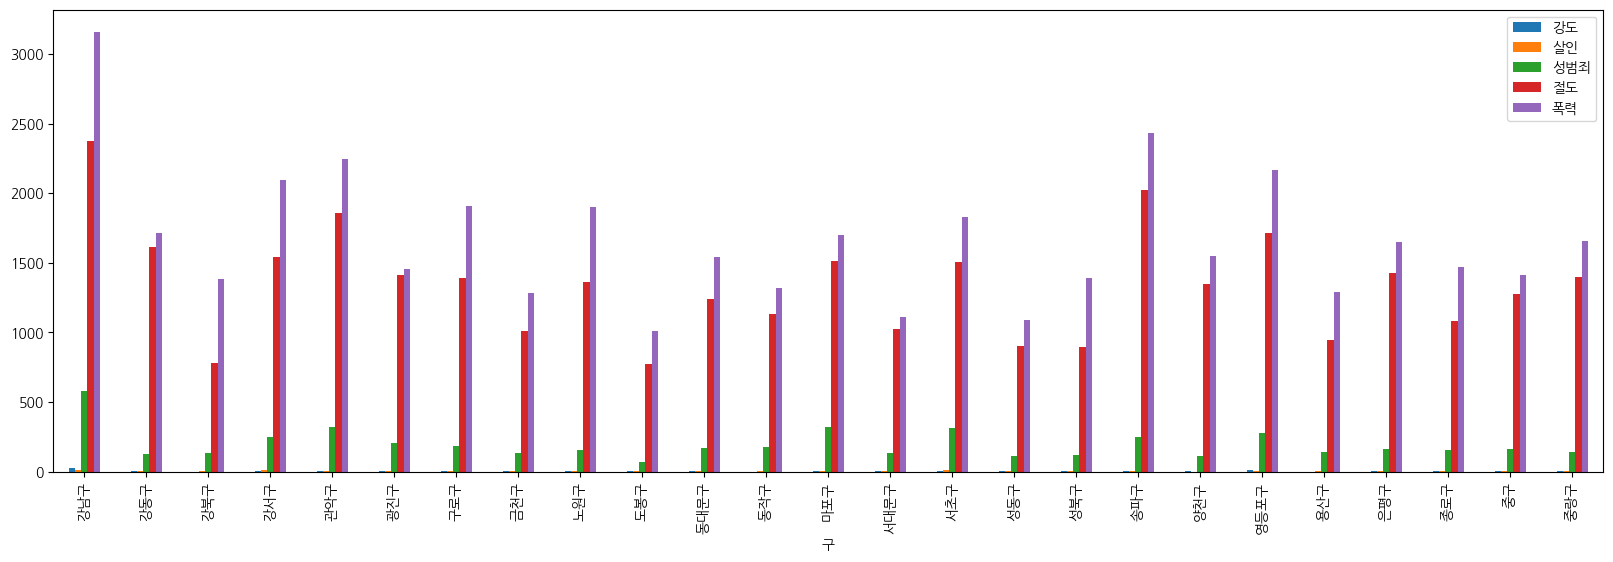

In [75]:
crime_gu[occur_col].plot(kind='bar', figsize=(20,6))

In [76]:
crime_gu.head()

,sample,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,,
강남구,21,25.0,12.0,578.0,2372.0,3159.0,92.00,91.67,78.55,48.90,87.02
강동구,1,6.0,3.0,124.0,1612.0,1713.0,100.00,100.00,83.06,55.15,85.29
강북구,2,1.0,4.0,136.0,777.0,1383.0,100.00,100.00,84.56,69.11,90.74
강서구,3,3.0,9.0,246.0,1540.0,2098.0,100.00,77.78,76.42,59.81,91.75
관악구,4,7.0,8.0,321.0,1860.0,2248.0,85.71,50.00,83.80,49.95,85.68


### 데이터 전처리
- 데이터 정규화
- 서로 단위가 다른 데이터를 동일한 크기 값으로 변환
- 0~1 사이 값이 되도록 변환

In [77]:
# 강남구에서 일어난 절도 사건 수
kn = crime_gu.loc['강남구','절도']
print('강남구에서 일어난 절도 사건 수', kn)
# 강동구에서 일어난 절도 사건 수
kd = crime_gu.loc['강동구','절도']
print('강동구에서 일어난 절도 사건 수', kd)
# 절도 사건 중에서 제일 큰 값?
print('절도 사건 중에서 제일 큰 값', crime_gu['절도'].max())


강남구에서 일어난 절도 사건 수 2372.0
강동구에서 일어난 절도 사건 수 1612.0
절도 사건 중에서 제일 큰 값 2372.0


In [78]:
crime_gu['폭력']
# crime_gu.폭력

구
강남구     3159.0
강동구     1713.0
강북구     1383.0
강서구     2098.0
관악구     2248.0
광진구     1456.0
구로구     1907.0
금천구     1282.0
노원구     1899.0
도봉구     1012.0
동대문구    1540.0
동작구     1319.0
마포구     1701.0
서대문구    1109.0
서초구     1827.0
성동구     1090.0
성북구     1392.0
송파구     2433.0
양천구     1546.0
영등포구    2169.0
용산구     1291.0
은평구     1647.0
종로구     1467.0
중구      1409.0
중랑구     1660.0
Name: 폭력, dtype: float64

In [79]:
crime_gu.loc['강남구','폭력']

3159.0

In [80]:
crime_gu['절도']

구
강남구     2372.0
강동구     1612.0
강북구      777.0
강서구     1540.0
관악구     1860.0
광진구     1414.0
구로구     1390.0
금천구     1013.0
노원구     1361.0
도봉구      772.0
동대문구    1240.0
동작구     1129.0
마포구     1510.0
서대문구    1027.0
서초구     1503.0
성동구      905.0
성북구      895.0
송파구     2024.0
양천구     1349.0
영등포구    1712.0
용산구      945.0
은평구     1424.0
종로구     1079.0
중구      1279.0
중랑구     1399.0
Name: 절도, dtype: float64

In [81]:
crime_gu.loc['강동구','절도'] / crime_gu['절도'].max()

0.6795952782462057

In [82]:
crime_gu.loc['강남구', '절도'] / crime_gu['절도'].max()

1.0

In [83]:
crime_gu.loc['강남구', '폭력']

3159.0

In [84]:
# 정규화 작업
occur_col

['강도', '살인', '성범죄', '절도', '폭력']

In [85]:
crime_gu_norm = crime_gu[occur_col] / crime_gu[occur_col].max()

In [86]:
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력
구,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000
강동구,0.24,0.250000,0.214533,0.679595,0.542260
강북구,0.04,0.333333,0.235294,0.327572,0.437797
강서구,0.12,0.750000,0.425606,0.649241,0.664134
관악구,0.28,0.666667,0.555363,0.784148,0.711618


In [87]:
crime_gu.loc[:, '강도검거율': '폭력검거율']

,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,
강남구,92.00,91.67,78.55,48.90,87.02
강동구,100.00,100.00,83.06,55.15,85.29
강북구,100.00,100.00,84.56,69.11,90.74
강서구,100.00,77.78,76.42,59.81,91.75
관악구,85.71,50.00,83.80,49.95,85.68
광진구,100.00,60.00,77.40,53.32,87.91
구로구,50.00,100.00,64.84,55.40,80.60
금천구,100.00,85.71,76.87,51.33,86.43
노원구,100.00,100.00,80.77,48.05,79.67


In [88]:
# crime_gu_norm = pd.concat([crime_gu_norm, crime_gu.loc[:, '강도검거율': '폭력검거율']], axis=1)

In [89]:
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력
구,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000
강동구,0.24,0.250000,0.214533,0.679595,0.542260
강북구,0.04,0.333333,0.235294,0.327572,0.437797
강서구,0.12,0.750000,0.425606,0.649241,0.664134
관악구,0.28,0.666667,0.555363,0.784148,0.711618


In [90]:
crime_gu_norm[arrest_rate] = crime_gu[arrest_rate]

In [91]:
crime_gu_norm.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000,92.00,91.67,78.55,48.90,87.02
강동구,0.24,0.250000,0.214533,0.679595,0.542260,100.00,100.00,83.06,55.15,85.29
강북구,0.04,0.333333,0.235294,0.327572,0.437797,100.00,100.00,84.56,69.11,90.74
강서구,0.12,0.750000,0.425606,0.649241,0.664134,100.00,77.78,76.42,59.81,91.75
관악구,0.28,0.666667,0.555363,0.784148,0.711618,85.71,50.00,83.80,49.95,85.68


<Axes: xlabel='구'>

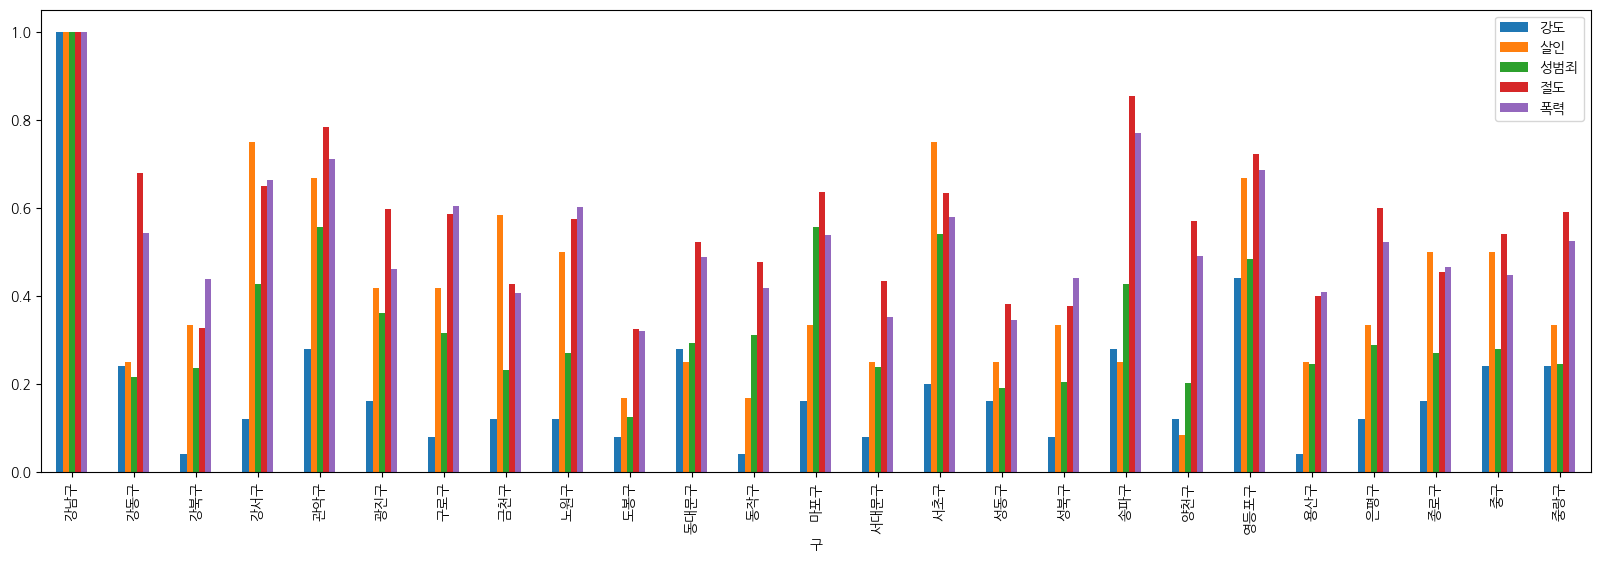

In [92]:
crime_gu_norm[occur_col].plot(kind='bar', figsize=(20,6))

### 데이터 전처리
- 기존 데이터를 활용한 새로운 컬럼 생성
- 범죄, 검거 평균 컬럼 생성

In [93]:
crime_gu_norm[occur_col].head()

,강도,살인,성범죄,절도,폭력
구,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000
강동구,0.24,0.250000,0.214533,0.679595,0.542260
강북구,0.04,0.333333,0.235294,0.327572,0.437797
강서구,0.12,0.750000,0.425606,0.649241,0.664134
관악구,0.28,0.666667,0.555363,0.784148,0.711618


In [94]:
# 1. 강동구에서 일어난 5대 범죄 선택
crime_gu_norm.loc['강동구', occur_col]

강도     0.240000
살인     0.250000
성범죄    0.214533
절도     0.679595
폭력     0.542260
Name: 강동구, dtype: float64

In [95]:
crime_gu_norm[occur_col].loc['강동구']

강도     0.240000
살인     0.250000
성범죄    0.214533
절도     0.679595
폭력     0.542260
Name: 강동구, dtype: float64

In [96]:
# 2. 강동구에서 일어난 5대 범죄 사건 다 더하기
crime_gu_norm.loc['강동구', occur_col].sum()

1.9263883591453994

In [97]:
crime_gu_norm[occur_col].loc['강동구'].sum()

1.9263883591453994

In [98]:
# 3. 강동구에서 일어난 5대 범죄 사건 더한 값에 5 나누기
crime_len = len(crime_gu_norm[occur_col].loc['강북구'])
crime_gu_norm[occur_col].loc['강동구'].sum() / crime_len
# crime_len

0.3852776718290799

In [99]:
# 강북구의 5대 범죄 평균값을 구해 주세요
gangbuk_crime_mean = crime_gu_norm[occur_col].loc['강북구'].sum() / crime_len
print(gangbuk_crime_mean)

0.2747991783175462


In [100]:
# numpy axis=1 행, axis=0 열
crime_gu_norm['범죄평균'] = np.mean(crime_gu_norm[occur_col], axis=1)

In [101]:
crime_gu_norm

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균
구,,,,,,,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000,92.00,91.67,78.55,48.90,87.02,1.000000
강동구,0.24,0.250000,0.214533,0.679595,0.542260,100.00,100.00,83.06,55.15,85.29,0.385278
강북구,0.04,0.333333,0.235294,0.327572,0.437797,100.00,100.00,84.56,69.11,90.74,0.274799
강서구,0.12,0.750000,0.425606,0.649241,0.664134,100.00,77.78,76.42,59.81,91.75,0.521796
관악구,0.28,0.666667,0.555363,0.784148,0.711618,85.71,50.00,83.80,49.95,85.68,0.599559
광진구,0.16,0.416667,0.359862,0.596121,0.460905,100.00,60.00,77.40,53.32,87.91,0.398711
구로구,0.08,0.416667,0.314879,0.586003,0.603672,50.00,100.00,64.84,55.40,80.60,0.400244
금천구,0.12,0.583333,0.231834,0.427066,0.405825,100.00,85.71,76.87,51.33,86.43,0.353612
노원구,0.12,0.500000,0.269896,0.573777,0.601140,100.00,100.00,80.77,48.05,79.67,0.412963


In [102]:
# 검거 평균치 컬럼도 생성해 주세요
crime_gu_norm['검거평균'] = np.mean(crime_gu_norm[arrest_rate], axis=1)

In [103]:
crime_gu_norm

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거평균
구,,,,,,,,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000,92.00,91.67,78.55,48.90,87.02,1.000000,79.628
강동구,0.24,0.250000,0.214533,0.679595,0.542260,100.00,100.00,83.06,55.15,85.29,0.385278,84.700
강북구,0.04,0.333333,0.235294,0.327572,0.437797,100.00,100.00,84.56,69.11,90.74,0.274799,88.882
강서구,0.12,0.750000,0.425606,0.649241,0.664134,100.00,77.78,76.42,59.81,91.75,0.521796,81.152
관악구,0.28,0.666667,0.555363,0.784148,0.711618,85.71,50.00,83.80,49.95,85.68,0.599559,71.028
광진구,0.16,0.416667,0.359862,0.596121,0.460905,100.00,60.00,77.40,53.32,87.91,0.398711,75.726
구로구,0.08,0.416667,0.314879,0.586003,0.603672,50.00,100.00,64.84,55.40,80.60,0.400244,70.168
금천구,0.12,0.583333,0.231834,0.427066,0.405825,100.00,85.71,76.87,51.33,86.43,0.353612,80.068
노원구,0.12,0.500000,0.269896,0.573777,0.601140,100.00,100.00,80.77,48.05,79.67,0.412963,81.698


In [104]:
# 범죄 평균치로 정렬했을 때,
# 서울시에서 범죄가 많이 일어나는 구는?
crime_gu_norm['범죄평균'].sort_values(ascending=False).head(1)

구
강남구    1.0
Name: 범죄평균, dtype: float64

In [105]:
# 검거 평균치로 정렬했을 때,
# 서울시에서 검거가 잘되는 구는?
# crime_gu_norm['검거평균'].sort_values(ascending=False).head(1)
crime_gu_norm.sort_values('검거평균', ascending=False).head(1)

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거평균
구,,,,,,,,,,,,
강북구,0.04,0.333333,0.235294,0.327572,0.437797,100.0,100.0,84.56,69.11,90.74,0.274799,88.882


### 데이터 저장하기

In [106]:
# 데이터 저장
crime_gu_norm.to_csv('../data/crime_gu_norm_2021.csv', encoding='utf-8')

In [107]:
# 데이터 불러오기
crime_gu_norm_new = pd.read_csv('../data/crime_gu_norm_2021.csv', index_col=0)

In [108]:
crime_gu_norm_new.head(30)

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거평균
구,,,,,,,,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000,92.00,91.67,78.55,48.90,87.02,1.000000,79.628
강동구,0.24,0.250000,0.214533,0.679595,0.542260,100.00,100.00,83.06,55.15,85.29,0.385278,84.700
강북구,0.04,0.333333,0.235294,0.327572,0.437797,100.00,100.00,84.56,69.11,90.74,0.274799,88.882
강서구,0.12,0.750000,0.425606,0.649241,0.664134,100.00,77.78,76.42,59.81,91.75,0.521796,81.152
관악구,0.28,0.666667,0.555363,0.784148,0.711618,85.71,50.00,83.80,49.95,85.68,0.599559,71.028
광진구,0.16,0.416667,0.359862,0.596121,0.460905,100.00,60.00,77.40,53.32,87.91,0.398711,75.726
구로구,0.08,0.416667,0.314879,0.586003,0.603672,50.00,100.00,64.84,55.40,80.60,0.400244,70.168
금천구,0.12,0.583333,0.231834,0.427066,0.405825,100.00,85.71,76.87,51.33,86.43,0.353612,80.068
노원구,0.12,0.500000,0.269896,0.573777,0.601140,100.00,100.00,80.77,48.05,79.67,0.412963,81.698


c:\Users\SBA\anaconda3\envs\my_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SBA\anaconda3\envs\my_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SBA\anaconda3\envs\my_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SBA\anaconda3\envs\my_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

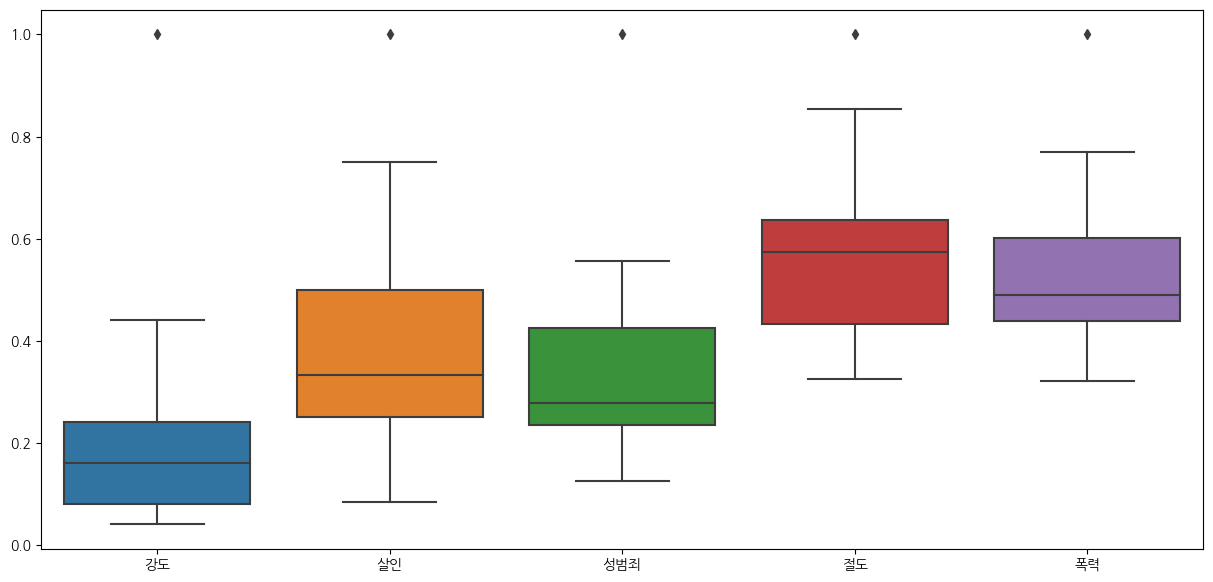

In [109]:
# boxplot
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(data=crime_gu_norm[occur_col])
plt.show()

In [110]:
crime_gu_norm_new[occur_col].describe()

,강도,살인,성범죄,절도,폭력
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.195200,0.413333,0.339862,0.565447,0.528737
std,0.192984,0.221108,0.182374,0.164279,0.152238
min,0.040000,0.083333,0.124567,0.325464,0.320355
25%,0.080000,0.250000,0.235294,0.432968,0.437797
50%,0.160000,0.333333,0.278547,0.573777,0.489395
75%,0.240000,0.500000,0.425606,0.636594,0.601140
max,1.000000,1.000000,1.000000,1.000000,1.000000


c:\Users\SBA\anaconda3\envs\my_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SBA\anaconda3\envs\my_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SBA\anaconda3\envs\my_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


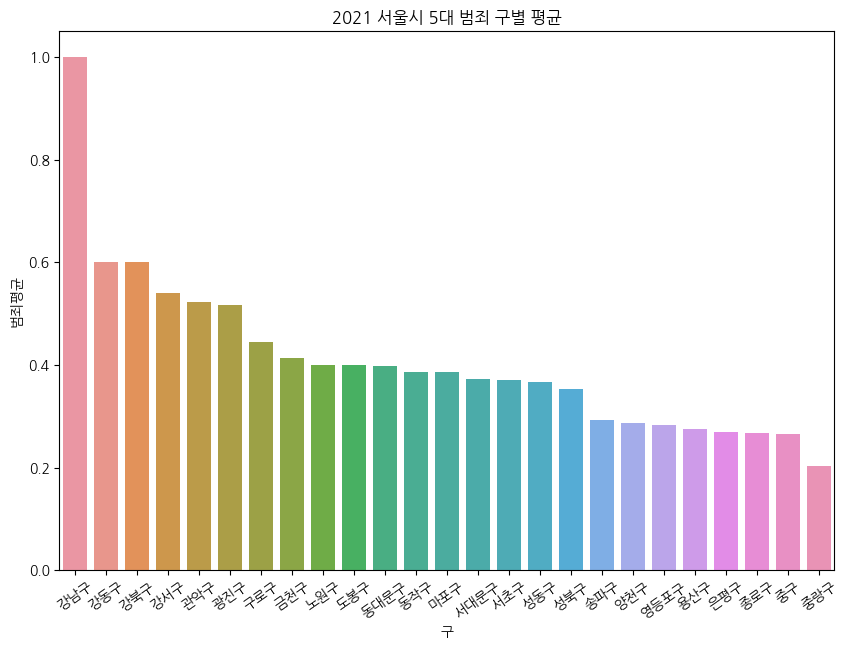

In [111]:
# x 축에는 구
# y 축에는 범죄 평균
# 2021 서울시 5대 범죄 구별 평균값
sns_gu = crime_gu_norm_new.index
sorted_data = crime_gu_norm_new.sort_values(by='범죄평균', ascending=False)
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(
    data = sorted_data, 
    x = sns_gu, 
    y = '범죄평균')

plt.title('2021 서울시 5대 범죄 구별 평균')
plt.xticks(rotation=35)
plt.show()

In [112]:
target_col = ['강도', '살인', '성범죄', '절도', '폭력', '범죄평균']

crime_gu_norm_new[target_col]

NameError: name 'target_col' is not defined

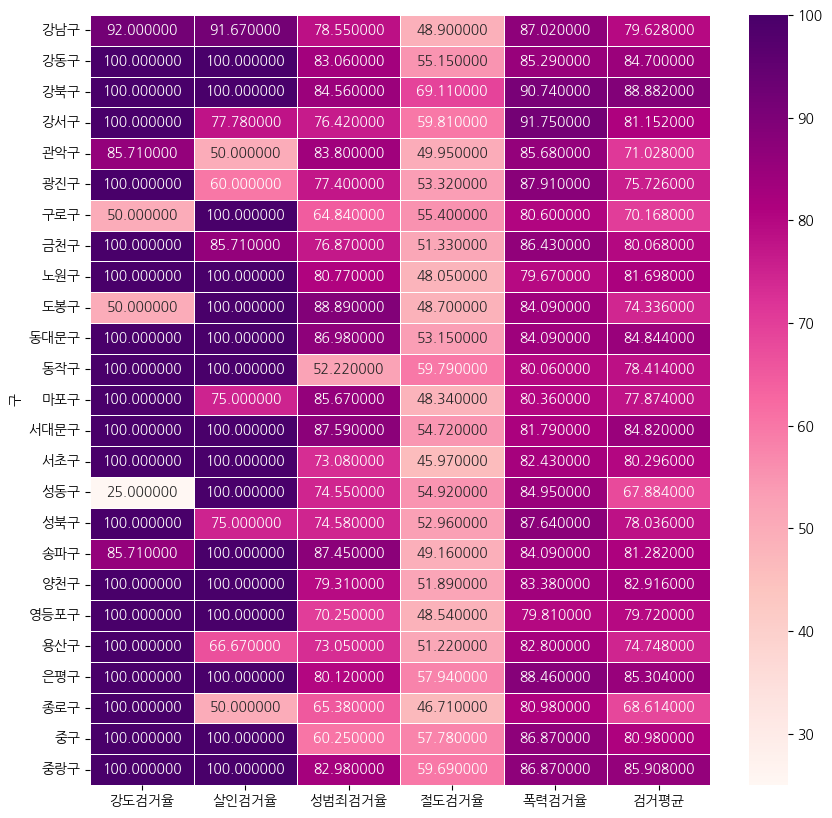

In [116]:
#heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=crime_gu_norm_new[target_col], annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.show()

In [113]:
print('Seaborn :', sns.__version__)
import matplotlib
print('Matplotlib :', matplotlib.__version__)


Seaborn : 0.12.2
Matplotlib : 3.7.1


In [114]:
crime_gu_norm_new.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율,범죄평균,검거평균
구,,,,,,,,,,,,
강남구,1.00,1.000000,1.000000,1.000000,1.000000,92.00,91.67,78.55,48.90,87.02,1.000000,79.628
강동구,0.24,0.250000,0.214533,0.679595,0.542260,100.00,100.00,83.06,55.15,85.29,0.385278,84.700
강북구,0.04,0.333333,0.235294,0.327572,0.437797,100.00,100.00,84.56,69.11,90.74,0.274799,88.882
강서구,0.12,0.750000,0.425606,0.649241,0.664134,100.00,77.78,76.42,59.81,91.75,0.521796,81.152
관악구,0.28,0.666667,0.555363,0.784148,0.711618,85.71,50.00,83.80,49.95,85.68,0.599559,71.028


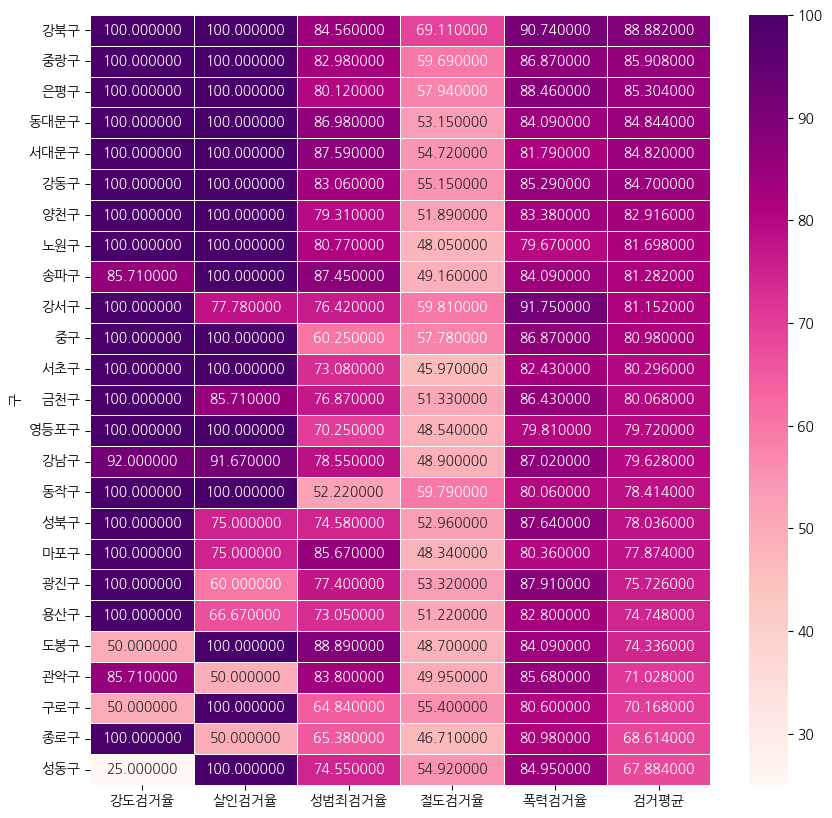

In [115]:
# heatmap
# 검거평균 값으로 내림차순 정렬한 데이터 프레임
# target_col => 검거율, 검거평균

target_col = ['강도검거율', '살인검거율', '성범죄검거율', '절도검거율', '폭력검거율', '검거평균']
crime_gu_norm_sort = crime_gu_norm.sort_values(by='검거평균', ascending=False)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=crime_gu_norm_sort[target_col], annot=True, fmt='f',linewidths=.5,cmap='RdPu')
plt.show()